https://www.machinelearningplus.com/python/101-pandas-exercises-python/

In [1]:
import matplotlib.pyplot as plt

# 1. how to import pandas and check the version?

In [2]:
import pandas as pd
pd.__version__

'0.23.4'

# 2. how to create a series form a list, numpy array and dict?

In [3]:
import numpy as np
mylist = list("abcedfghijklmnopqrstuvwxyz")
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

In [4]:
pd.Series(mylist).head()

0    a
1    b
2    c
3    e
4    d
dtype: object

In [5]:
pd.Series(myarr).head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [6]:
pd.Series(mydict).head()

a    0
b    1
c    2
e    3
d    4
dtype: int64

# 3 how to convert the index of series into a column of a dataframe?

In [7]:
mylist = list("abcedfghijklmnopqrstuvwxyz")
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

In [8]:
ser.to_frame().reset_index().head()

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


# How to comine many series to form a dataframe?
Combine ser1 and ser2 to form a dataframe.

In [9]:
import numpy as np
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

In [10]:
df1 = pd.DataFrame({"ser1" : ser1, "ser2": ser2})
# alt
df2 = pd.concat([ser1, ser2], axis = 1)

In [11]:
df1.head()

,ser1,ser2
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


In [12]:
df2.head()

,0,1
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


# 5 how to assign name to series' index?
give a name to the series ser calling it "alphabets"

In [13]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

In [14]:
ser.rename("alphabets")
# alt
ser.name = "alphabets"

In [15]:
ser.head()

0    a
1    b
2    c
3    e
4    d
Name: alphabets, dtype: object

# 6. how to get the items of series A not present in Series B?
from ser1 remove items present in ser2

In [16]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [17]:
ser1[~(ser1.isin(ser2))]

0    1
1    2
2    3
dtype: int64

# 7 how to get the items not common to both series A and series B?
get all items of ser1 and ser2 not common to both

In [18]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [19]:
ser_u = pd.Series(np.setxor1d(ser1,ser2))
ser_u

0    1
1    2
2    3
3    6
4    7
5    8
dtype: int64

# 8 how to get the minimum, 25th percentile, median, 75th and max of a numeric series?
Compute the minimum, 25th percentile, median, 75th, and maximum of ser.

In [20]:
state = np.random.RandomState(100)
ser = pd.Series(np.random.normal(10, 5, 25))

In [21]:
np.percentile(ser, q=[0, 25, 50, 75, 100])

array([-1.0449794 ,  5.59935629,  7.96705007, 12.33639145, 23.23705854])

# 9 how to get frequency counts of unique items of a series?
calculate the freqency counts of each unique value ser.

In [22]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))

In [23]:
ser.value_counts()

e    7
d    5
a    5
h    4
b    3
f    3
c    2
g    1
dtype: int64

# 10 how to keep only top 2 most frequent values as it is and replace everything else as "Other"?
from ser, keep the top 2 most ferquent items as it is and replace everything else as "Other".

In [24]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))

In [25]:
vals = ser.value_counts()
print("top 2 freq:\n", vals)

top 2 freq:
 1    4
4    3
3    3
2    2
dtype: int64


In [26]:
ser[~ser.isin(vals.index[:2])] = "Others"
ser

0          1
1          1
2     Others
3          4
4          1
5     Others
6     Others
7          1
8     Others
9     Others
10         4
11         4
dtype: object

# 11 how to bin a numeric series to 10 groups of equal size?
Bin the series ser into 10 equal deciles and replace the value with the bin name

In [27]:
np.random.RandomState(100)
ser = pd.Series(np.random.random(20))

In [28]:
binned = pd.qcut(ser,q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                        labels=['1st', '2nd', '3rd', '4th', '5th',
                                '6th', '7th', '8th', '9th', '10th'])
binned.head()


0     2nd
1     6th
2     2nd
3    10th
4     6th
dtype: category
Categories (10, object): [1st < 2nd < 3rd < 4th ... 7th < 8th < 9th < 10th]

# 12 how to convert a numpy array to a dataframe of given shape?
reshape the series ser into a dataframe of 7 rows and 5 columns

In [29]:
ser = pd.Series(np.random.randint(1, 10, 35))

In [30]:
df = pd.DataFrame(ser.values.reshape(7,5))
print("shape:", df.shape)
df.head()

shape: (7, 5)


,0,1,2,3,4
0,8,2,1,7,1
1,4,8,2,1,5
2,3,5,9,8,6
3,6,3,8,9,3
4,6,7,8,2,6


# 13 how to find the position of numbers that are multiples of 3 from a series?
find the position of numbesr that are multiples of 3 from ser.

In [31]:
ser = pd.Series(np.random.randint(1, 10, 7))

In [32]:
ser

0    6
1    6
2    2
3    8
4    4
5    2
6    3
dtype: int64

In [33]:
np.argwhere(ser % 3 == 0)

array([[0],
       [1],
       [6]])

# 14 how to extract items at given positions from a series
from ser, extract the items at positions in list pos.

In [34]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

In [35]:
ser[pos]
# alt
ser.take(pos)

0     a
4     e
8     i
14    o
20    u
dtype: object

# 15 how to stack two series vertically and horizontally?
stack ser1 and ser2 vertically and horizontally [to form a dataframe].

In [36]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

In [37]:
# vertical
ser1.append(ser2)

# horizontal
pd.concat([ser1,ser2],axis=1)

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


# 16 how to get the positions of items of a series A in another series B?
get the positions of items of ser2 in ser1 as a list.

In [38]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

In [39]:
[np.where(i == ser1)[0].tolist()[0] for i in ser2]

[5, 4, 0, 8]

In [40]:
[pd.Index(ser1).get_loc(i) for i in ser2]

[5, 4, 0, 8]

# 17 how to compute the mean squared error on a truth and predicted series?
compute the mean squared error of truth and pred series.

In [41]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

In [42]:
((truth - pred)**2).mean()

0.4717979174412144

# 18 how to convert the first character of each element in a series to uppercase?
change the first character of each word to upper case in each word of ser.

In [43]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [44]:
ser_upper = ser.apply(lambda x: x.capitalize())

In [45]:
ser_upper

0     How
1      To
2    Kick
3    Ass?
dtype: object

# 19 how to calclate the number of characters in each word in a series?

In [46]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [47]:
ser.apply(lambda x: len(x))

0    3
1    2
2    4
3    4
dtype: int64

# 20 how to compute difference of differences between consequtive numbers of a series
difference of differences between the consequtive numbers of ser.

In [48]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

In [49]:
print(ser.diff(1).tolist())
print(ser.diff(1).diff(1).tolist())

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]
[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]


# 21 how to convert a series of date-strings to a timeseries?

In [50]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

In [51]:
pd.to_datetime(ser)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

# 22 how to get the day of month, week number, day of year and day of week from a series of date strings?
Get the day of month, week number, day of year and day of week from ser.

In [52]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

In [53]:
ser_dt = pd.to_datetime(ser)
print("Date: ", ser_dt.dt.day.tolist())
print("Week number:", ser_dt.dt.week.tolist())
print("Day num of year:", ser_dt.dt.dayofyear.tolist())
print("Day of week:", ser_dt.dt.weekday_name.tolist())

Date:  [1, 2, 3, 4, 5, 6]
Week number: [53, 5, 9, 14, 19, 23]
Day num of year: [1, 33, 63, 94, 125, 157]
Day of week: ['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']


# 23 how to convert year-month string to dates corresponding to the 4th day of the month?
Change ser to dates that start with 4th of the respective months.

In [54]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])

In [55]:
ser_wd = ser.apply(lambda x: x + " 04")

In [56]:
pd.to_datetime(ser_wd)

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

# 24 how to filter words that contain atleast 2 vovwels from a series?
From ser, extract words that cotain atleast 2 vowels.

In [57]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])

In [58]:
def vowelCounter(word):
    vowels = ["a", "e", "i", "o", "u"]
    cc = 0
    for v in vowels:
        cc += word.lower().count(v)
    return(cc)

In [59]:
ser[ser.apply(lambda x: True if vowelCounter(x) >= 2 else False)]

0     Apple
1    Orange
4     Money
dtype: object

# 25 How to filter valid emails from a series?
Extract the valid emails from the series emails. The regex pattern for valid emails is provoded as refernce.

In [60]:
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

In [61]:
# import regex module
email_pat = emails.str.findall(pattern)
# remove all removed cases
email_pat[email_pat.apply(lambda x: True if len(x) > 0 else False)].tolist()

[['rameses@egypt.com'], ['matt@t.co'], ['narendra@modi.com']]

# 26 how to get the mean of a series grouped by another series?
Compute the mean of weights of each fruit.

In [62]:
fruits = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))

In [63]:
weights.groupby(fruits).mean()

apple     6.6
banana    2.0
carrot    5.0
dtype: float64

# 27 how to compute the euiclidian distance between two series?
Compute the euclidean distance between series (points) p and q, without using a packaged formula.

In [64]:
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [65]:
np.sum((p-q)**2)**0.5

18.16590212458495

# 28 how to find all the local maxima (or peaks) in a numeric series?
Get the positions of peaks [values surrounded by smaller values on both sides] in ser.

In [67]:
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

In [83]:
ser_peaks = ser[(ser.shift(1) < ser) & (ser > ser.shift(-1))]

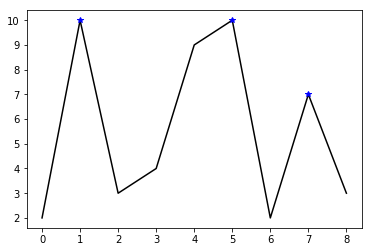

In [86]:
plt.plot(range(len(ser)),ser,'k-')
plt.plot(ser_peaks,'b*')

# 29 How to replace missing spaces in a string with the least frequent character?
Replace the spaces in my_str with the least frequent character.

In [143]:
my_str = 'dbc deb abed gade'

In [144]:
ser = pd.Series(list(my_str))

In [145]:
freq = ser.value_counts()
print(freq)

d    4
b    3
e    3
     3
a    2
g    1
c    1
dtype: int64


In [146]:
least_freq = freq.dropna().index[-1]

In [147]:
"".join(ser.replace(" ", least_freq))

'dbccdebcabedcgade'

# 30 how to create a TimeSeries starting "2000-01-01" and 10 weekends (saturdays) after that having random numbers as values?

In [170]:
dates = pd.date_range("2000-01-01",periods=10, freq="W-SAT")
vals = np.random.randint(0,10,size=10)

ser = pd.Series(vals, dates)
ser

2000-01-01    5
2000-01-08    2
2000-01-15    1
2000-01-22    2
2000-01-29    7
2000-02-05    3
2000-02-12    5
2000-02-19    7
2000-02-26    7
2000-03-04    4
Freq: W-SAT, dtype: int64

# 31 How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?
ser has missing dates and values. Make all missing dates appear and fill up with values from previous dates. 

In [200]:
ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
print(ser)

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     NaN
dtype: float64


In [221]:
ser.resample("D").ffill()

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64